In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("shopping_trends.csv")

About data 

In [ ]:
print(df)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
print('columns with numeric data')
print(df.select_dtypes(include='number').columns.tolist())
print('columns with non numerica data')
print(df.select_dtypes(exclude='number').columns.tolist())

In [ ]:
df.rename(columns= {'Purchase Amount (USD)':'Amount'},inplace=True)

In [ ]:
df.isnull().sum()

# Exploratory data analysis

In [ ]:
df.columns

Gender

In [ ]:
sns.countplot(x = 'Gender', data=df)


In [ ]:
ax = sns.countplot(x='Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [ ]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount', data=sales_gen)

From above graphs we can see that most of the buyers are males and even the purchasing power of males are greater than female.


According to Age

In [ ]:
df.columns

In [ ]:
sns.set(rc={'figure.figsize':(19,5)})

sns.countplot(x='Age', data=df)

In [ ]:
ax = sns.countplot(x='Age', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
df.groupby(['Age'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [ ]:
sales_gen = df.groupby(['Age'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age', y = 'Amount', data=df)

Above graph show that age no. 69 have more purchase. And age 53 have more purchasing in the term of money

Item Purchased

In [ ]:
df.columns

<Axes: xlabel='Item Purchased', ylabel='count'>

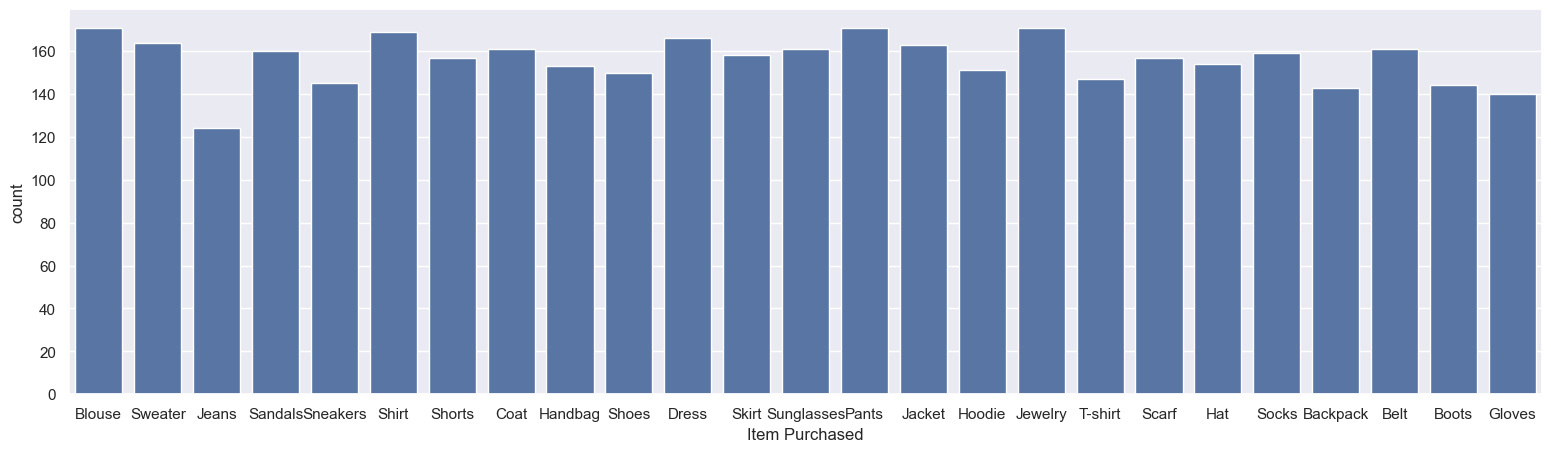

In [103]:
sns.countplot(x='Item Purchased', data=df)

In [ ]:
ax = sns.countplot(x='Item Purchased', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
df.groupby(['Item Purchased'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [ ]:
sales_gen = df.groupby(['Item Purchased'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Item Purchased', y = 'Amount', data=df)

from above graph we know that jewelry pants and blouse have more sale and t-shirt have more amount of sale

Category

In [ ]:
df.columns

In [ ]:
sns.countplot(x='Category', data=df)

In [ ]:
ax = sns.countplot(x='Category', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
df.groupby(['Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [ ]:
sales_gen = df.groupby(['Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Category', y = 'Amount', data=df)

from the above graph we know that clothing categories have more sell and clothing have more amount of sale.

size

In [106]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Amount',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
sns.countplot(x='Size', data=df)

In [ ]:
ax = sns.countplot(x='Size', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
df.groupby(['Size'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [ ]:
sales_gen = df.groupby(['Size'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Size', y='Amount', data=df)

from the above graph we can know that medium size is sell more and also in term of money the medium size is sell more

Color

In [ ]:
df.columns

In [ ]:
sns.countplot(x='Color', data=df)

In [ ]:
ax = sns.countplot(x='Color', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
df.groupby(['Color'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [ ]:
sales_gen = df.groupby(['Color'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Color', y='Amount', data=df)

from the above graph olive is the most sell color and green is most in the term in amount.

Season.

In [ ]:
df.columns

In [ ]:
sns.countplot(x='Season', data=df)

In [ ]:
ax = sns.countplot(x='Season', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
df.groupby(['Season'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [ ]:
sales_gen = df.groupby(['Season'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Season', y='Amount', data=sales_gen)

from the above graph we know that maximum sale is in spring but in trem of amount it is in Fall.

Review Rating

In [ ]:
df.columns

In [ ]:
sns.countplot(x='Review Rating', data=df)

In [ ]:
am = sns.countplot(x='Review Rating', data=df)
for bars in am.containers:
    am.bar_label(bars)

In [110]:
df.groupby(['Review Rating'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)


,Review Rating,Amount
9,3.4,10739
15,4.0,10722
24,4.9,10605
17,4.2,10406
21,4.6,10037
5,3.0,9838
14,3.9,9605
4,2.9,9600
19,4.4,9563
1,2.6,9471


<Axes: xlabel='Review Rating', ylabel='Amount'>

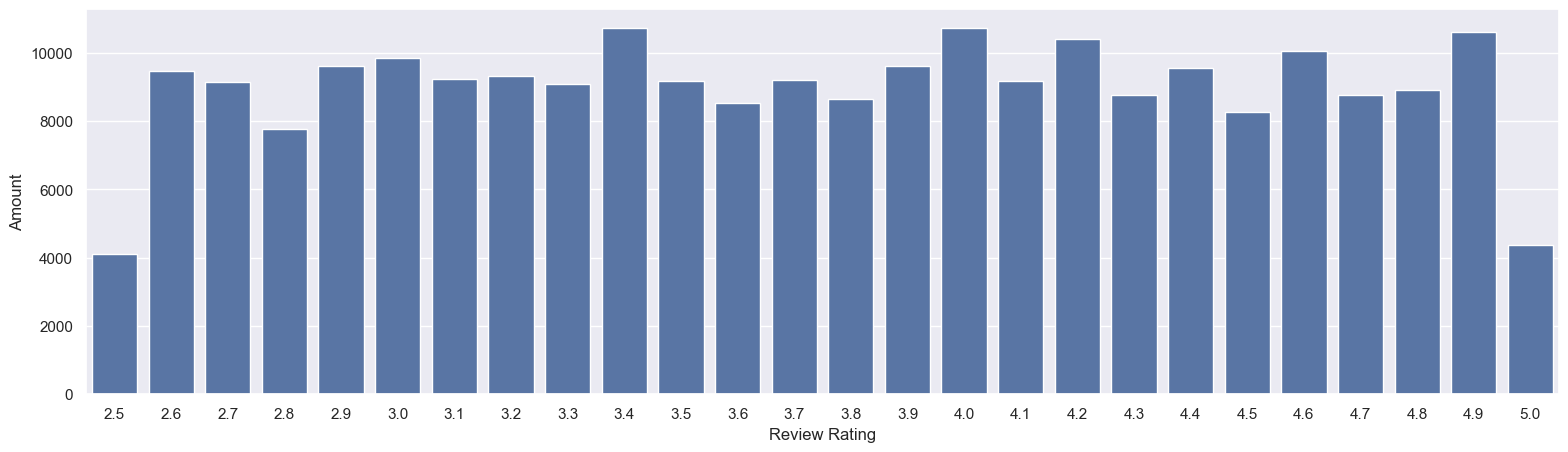

In [111]:
sales_gen = df.groupby(['Review Rating'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Review Rating', y='Amount', data=sales_gen)

from the above graph 3.4 is more rating and also in the term of amount 3.4 is the most rating

In [112]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Amount',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='Subscription Status', ylabel='count'>

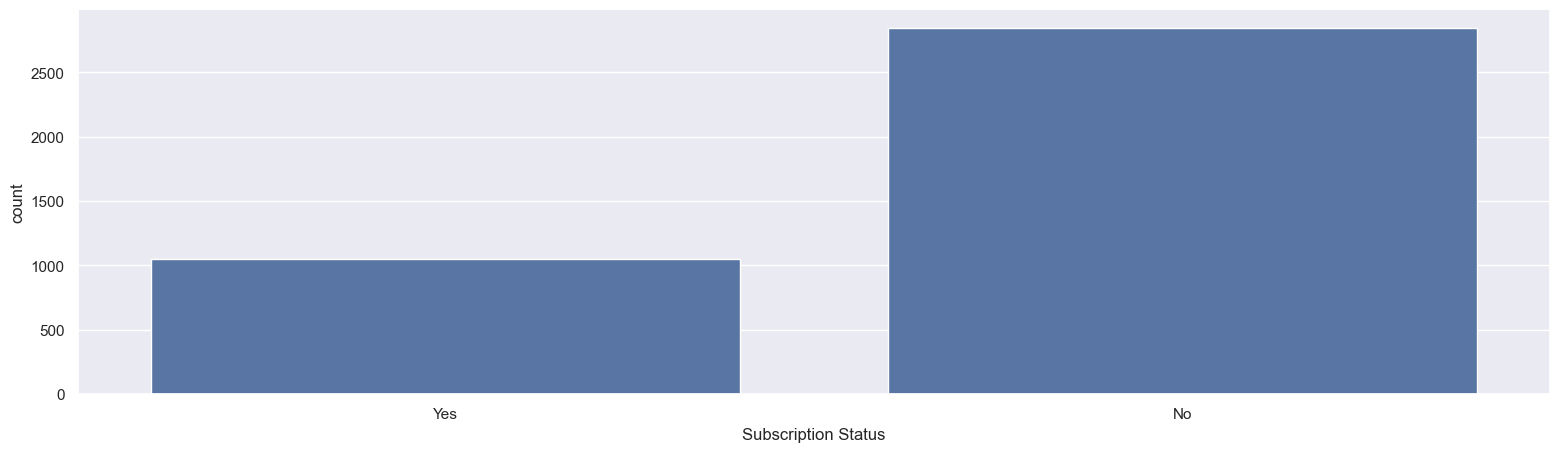

In [113]:
sns.countplot(x='Subscription Status', data=df)

In [122]:
df.groupby(['Subscription Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Subscription Status,Amount
0,No,170436
1,Yes,62645


<Axes: xlabel='Subscription Status', ylabel='Amount'>

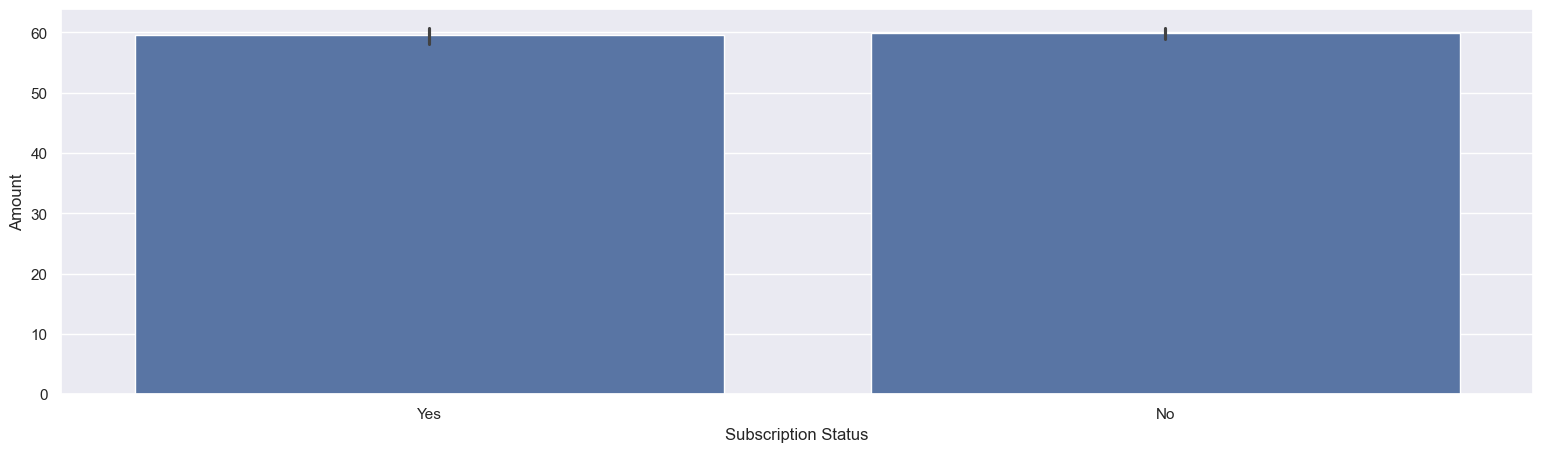

In [123]:
sales_gen = df.groupby(['Subscription Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x= 'Subscription Status', y = 'Amount', data=df)